In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
data = []
labels = []
classes = 43
class_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
               'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
               'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons',
               'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles',
               'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
               'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
               'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
               'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead',
               'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
               'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']

In [3]:
os.chdir(r"C:\task2")
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [4]:
data = np.array(data)
labels = np.array(labels)
np.save("./training/data", data)
np.save("./training/target", labels)
data = np.load("./training/data.npy")
labels = np.load("./training/target.npy")

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/15


981/981 [==============================] - 53s 51ms/step - loss: 1.4528 - accuracy: 0.6665 - val_loss: 0.3180 - val_accuracy: 0.9263
Epoch 2/15
981/981 [==============================] - 45s 46ms/step - loss: 0.3525 - accuracy: 0.9017 - val_loss: 0.2139 - val_accuracy: 0.9436
Epoch 3/15
981/981 [==============================] - 41s 42ms/step - loss: 0.2665 - accuracy: 0.9278 - val_loss: 0.1692 - val_accuracy: 0.9560
Epoch 4/15
981/981 [==============================] - 34s 34ms/step - loss: 0.2071 - accuracy: 0.9454 - val_loss: 0.1269 - val_accuracy: 0.9741
Epoch 5/15
981/981 [==============================] - 28s 29ms/step - loss: 0.2181 - accuracy: 0.9475 - val_loss: 0.1096 - val_accuracy: 0.9741
Epoch 6/15
981/981 [==============================] - 33s 33ms/step - loss: 0.1845 - accuracy: 0.9548 - val_loss: 0.1187 - val_accuracy: 0.9791
Epoch 7/15
981/981 [==============================] - 50s 51ms/step - loss: 0.2227 - accuracy: 0.9491 - val_loss: 0.0881 - val_accura

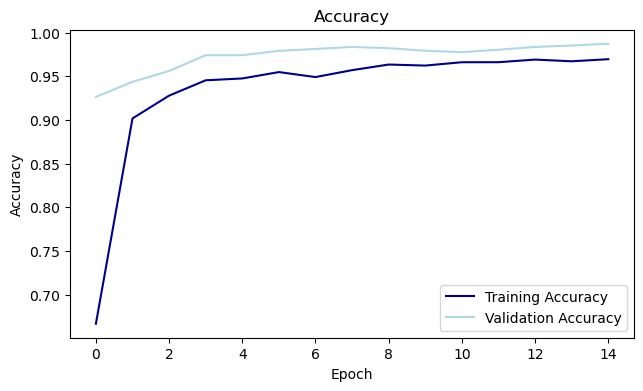

In [39]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy',color='darkblue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='lightblue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

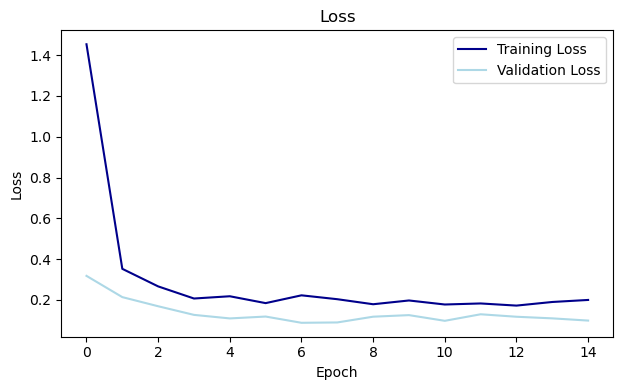

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss',color='darkblue')
plt.plot(history.history['val_loss'],label='Validation Loss',color='lightblue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
test_image_path = r"C:\task2\Test\00032.png"
test_image = Image.open(test_image_path)
test_image = test_image.resize((30, 30))
test_image = np.array(test_image).reshape(1, 30, 30, 3)
prediction_probs = model.predict(test_image)
predicted_class = np.argmax(prediction_probs)

1/1 [==============================] - 1s 1s/step


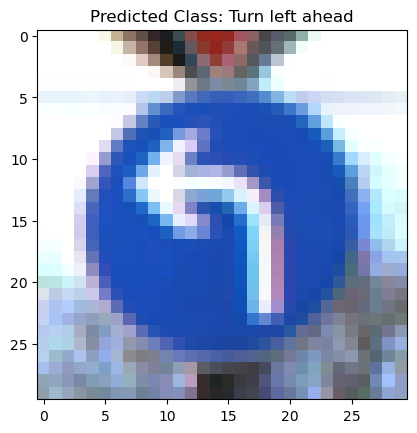

In [14]:
plt.imshow(test_image.reshape(30, 30, 3))
plt.title(f"Predicted Class: {class_names[predicted_class]}")
plt.show()

In [17]:
y_pred_probs = model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat_df = pd.DataFrame(conf_mat,index=class_names,columns=class_names)

246/246 [==============================] - 23s 81ms/step


In [28]:
print("Classification Report:",classification_report(y_true,y_pred,target_names=class_names))

Classification Report:                                                     precision    recall  f1-score   support

                              Speed limit (20km/h)       0.97      0.93      0.95        41
                              Speed limit (30km/h)       0.98      0.99      0.98       439
                              Speed limit (50km/h)       0.98      0.98      0.98       451
                              Speed limit (60km/h)       0.99      0.96      0.98       276
                              Speed limit (70km/h)       0.99      0.99      0.99       402
                              Speed limit (80km/h)       0.94      0.98      0.96       375
                       End of speed limit (80km/h)       0.99      1.00      0.99        88
                             Speed limit (100km/h)       1.00      0.97      0.98       297
                             Speed limit (120km/h)       0.99      0.97      0.98       263
                                        No passing      